In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from catboost import CatBoostClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [6]:
df = pd.read_csv('processed-data.csv')

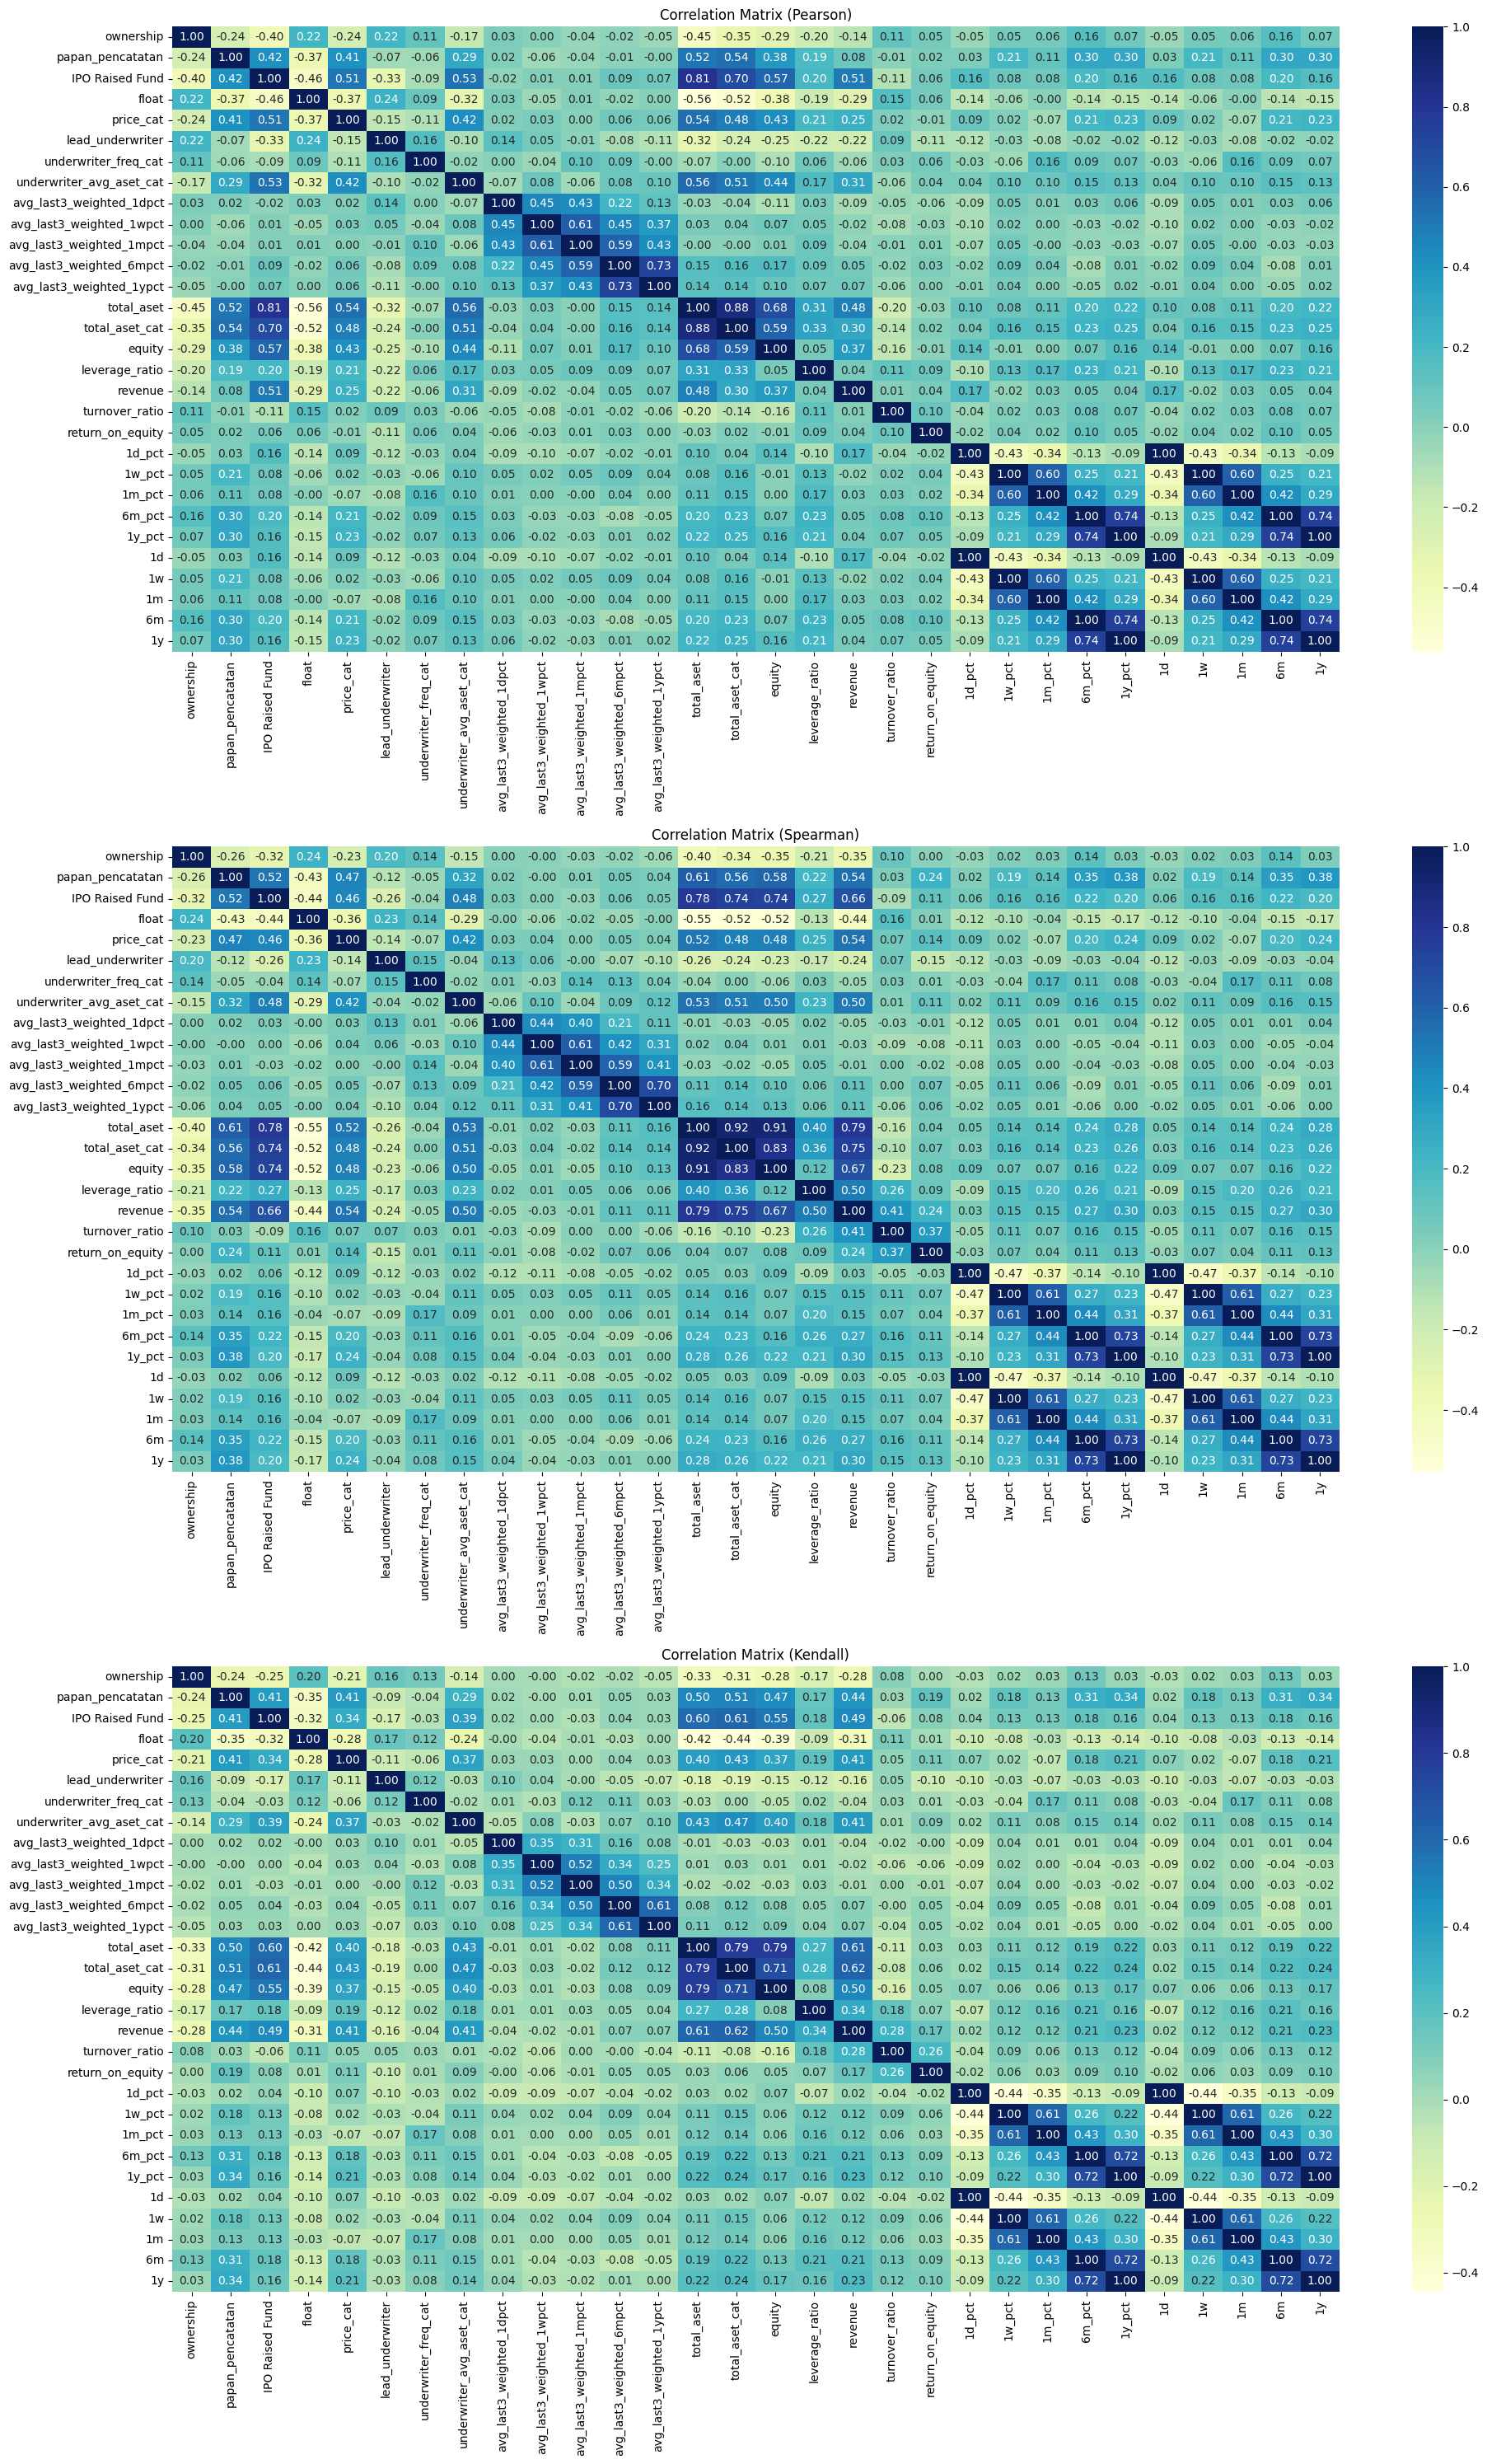

In [7]:
corr_methods = ['pearson', 'spearman', 'kendall']
plt.figure(figsize=(20, 10 * len(corr_methods)))

for i, method in enumerate(corr_methods, 1):
    plt.subplot(len(corr_methods), 1, i)
    corr = df.iloc[:].corr(method=method)
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True)
    plt.title(f'Correlation Matrix ({method.title()})')

plt.tight_layout()
plt.show()

### 1YEAR

In [58]:
feature_cols = [
    'papan_pencatatan', 'IPO Raised Fund', 'float', 'price_cat',
    'total_aset_cat', 'equity', 'leverage_ratio', 'revenue', 'turnover_ratio',
    'return_on_equity'
]

X = df[feature_cols]
y = df['1y']

mask = y != 2
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


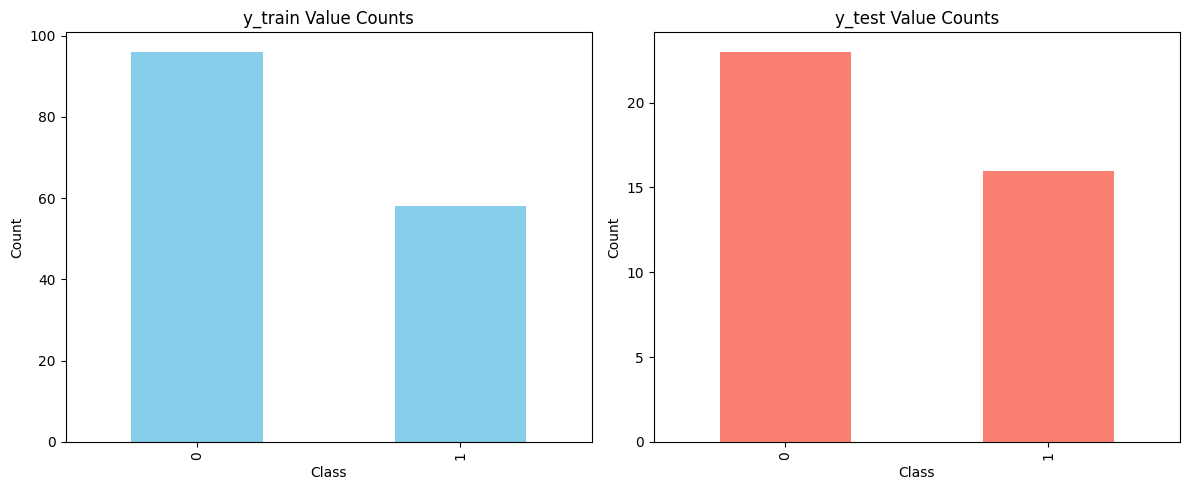

In [59]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
y_train.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('y_train Value Counts')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
y_test.value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('y_test Value Counts')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [60]:
print("Before SMOTE:", y_train.value_counts().to_dict())

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train.value_counts().to_dict())

Before SMOTE: {0: 96, 1: 58}
After SMOTE: {1: 96, 0: 96}


c:\Users\nathan\anaconda3\envs\AI\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


#### Random Forest

In [61]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        23
           1       0.60      0.75      0.67        16

    accuracy                           0.69        39
   macro avg       0.69      0.70      0.69        39
weighted avg       0.71      0.69      0.69        39



,precision,recall,f1-score,support
0,0.789474,0.652174,0.714286,23.000000
1,0.600000,0.750000,0.666667,16.000000
accuracy,0.692308,0.692308,0.692308,0.692308
macro avg,0.694737,0.701087,0.690476,39.000000
weighted avg,0.711741,0.692308,0.694750,39.000000


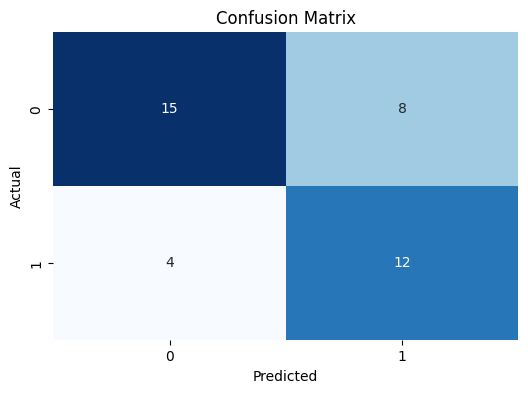

In [62]:
y_pred = rf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Catbooost

In [63]:
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.57      0.60        23
           1       0.47      0.56      0.51        16

    accuracy                           0.56        39
   macro avg       0.56      0.56      0.56        39
weighted avg       0.58      0.56      0.57        39



,precision,recall,f1-score,support
0,0.650000,0.565217,0.604651,23.000000
1,0.473684,0.562500,0.514286,16.000000
accuracy,0.564103,0.564103,0.564103,0.564103
macro avg,0.561842,0.563859,0.559468,39.000000
weighted avg,0.577665,0.564103,0.567578,39.000000


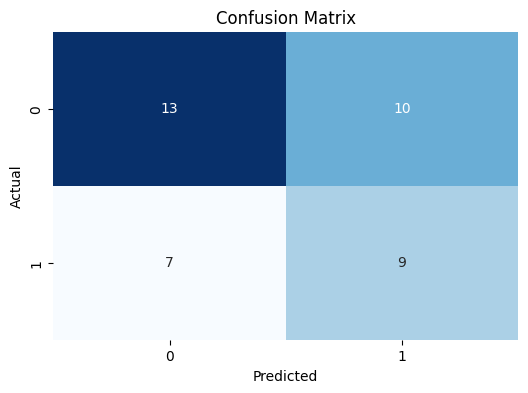

In [65]:
y_pred = catboost_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()